<a href="https://colab.research.google.com/github/a2r4vind/Machine-Learning-Models/blob/main/CNN_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing CNN model for Image Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

Load the CIFAR-10 dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


preprocess the CIFAR-10 dataset

In [4]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [5]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Build the model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [10]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 83ms/step - accuracy: 0.3193 - loss: 1.8369 - val_accuracy: 0.5606 - val_loss: 1.2482
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.5587 - loss: 1.2439 - val_accuracy: 0.6102 - val_loss: 1.1122
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.6258 - loss: 1.0783 - val_accuracy: 0.6274 - val_loss: 1.0621
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.6601 - loss: 0.9762 - val_accuracy: 0.6536 - val_loss: 0.9701
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6893 - loss: 0.8915 - val_accuracy: 0.6810 - val_loss: 0.9302
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.7070 - loss: 0.8378 - val_accuracy: 0.6842 - val_loss: 0.9139
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.7231 - loss: 0.7888 - val_accuracy: 0.6920 - val_loss: 0.8893
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.7312 - loss: 0.7601 - 

Evaluate the model


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7109 - loss: 0.8453
Test accuracy: 0.7128000259399414


Make predictions using the trained model

In [12]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


Display a few predictions and their corresponding true labels

In [18]:
!pip install matplotlib

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [29]:
plt.figure(figsize=(100,100))

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

/tmp/ipython-input-3139576887.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


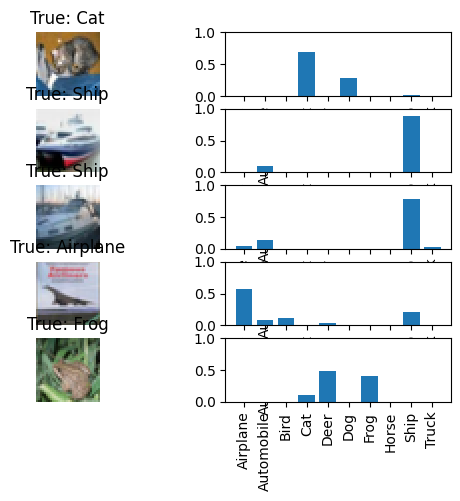

In [39]:
for i in range(5):
  plt.subplot(5,2,2*i+1)
  plt.imshow(test_images[i])
  plt.title(f'True: {class_names[np.argmax(test_labels[i])]}')
  plt.axis('off')
  plt.subplot(5,2,2*i+2)
  plt.bar(range(10), predictions[i])
  plt.xticks(range(10), class_names, rotation=90)
  plt.ylim([0,1])

plt.tight_layout()
plt.show()